In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [130]:
# import data
weather = pd.read_csv("cleaned_data/weather_data_cleaned.csv")

season = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall",
    12: "Winter",
}


weather["season"] = weather["monthnum"].apply(lambda x: season[x])


life_expect = pd.read_csv("cleaned_data/life_expectancy_data_cleaned.csv")

life_expect = life_expect.drop(columns=["Life Expectancy Standard Error"])
life_expect["above_country_avg"] = life_expect["Life Expectancy"] > 80

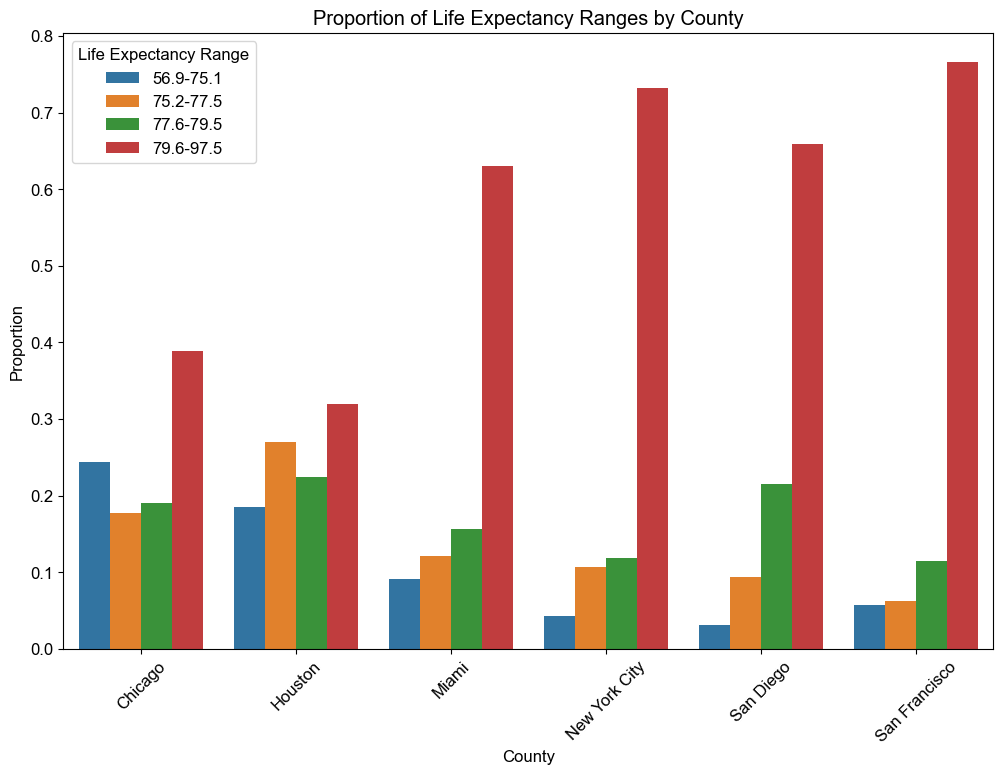

In [131]:
sec_data = (
    life_expect.groupby(["County", "Life Expectancy Range"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name="Proportion")
)

# Combine the two ranges into a single range
sec_data["Life Expectancy Range"] = sec_data["Life Expectancy Range"].replace(
    ["79.6-81.6", "81.7-97.5"], "79.6-97.5"
)

# Recalculate the proportions
sec_data_agg = (
    sec_data.groupby(["County", "Life Expectancy Range"])["Proportion"]
    .sum()
    .reset_index()
)

# Plot the aggregated data


plt.figure(figsize=(12, 8))
sns.barplot(x="County", y="Proportion", hue="Life Expectancy Range", data=sec_data_agg)
plt.title("Proportion of Life Expectancy Ranges by County")
plt.xlabel("County")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Life Expectancy Range")
plt.show()

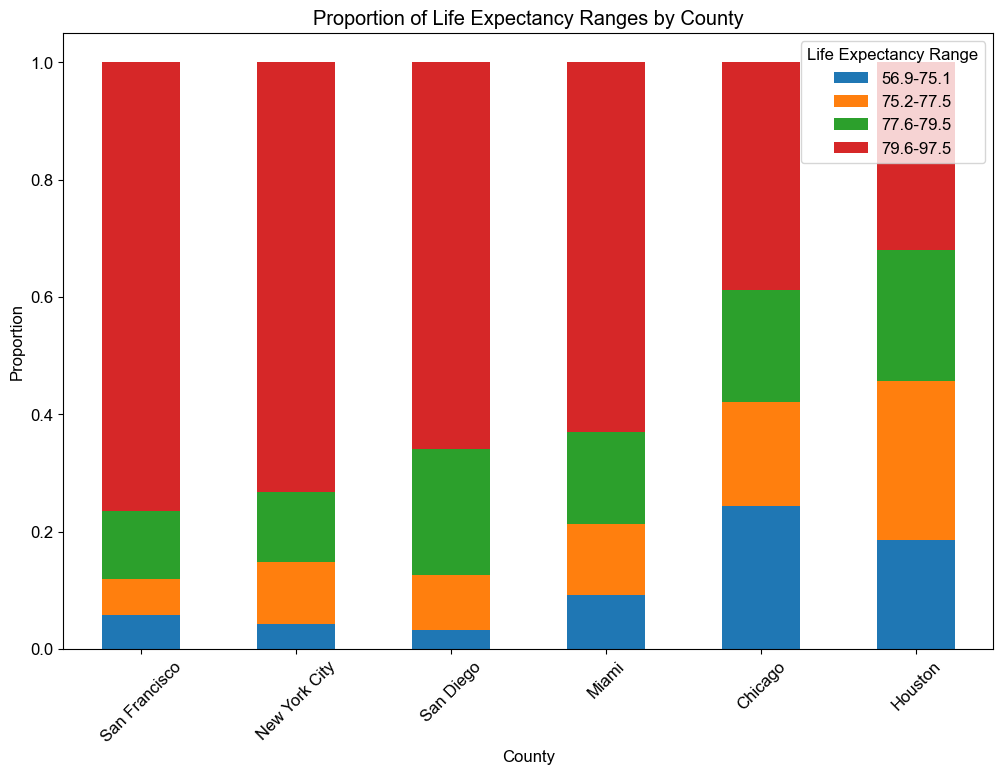

In [132]:
# Create a pivot table from sec_data_agg
sec_data_pivot = sec_data_agg.pivot(index='County', columns='Life Expectancy Range', values='Proportion')

# Sort the pivot table by the '79.6-97.5' column in descending order
sec_data_pivot_sorted = sec_data_pivot.sort_values(by="79.6-97.5", ascending=False)

# Create a stacked bar chart with the sorted data
plt.figure(figsize=(12, 8))
sec_data_pivot_sorted.plot(kind="bar", stacked=True, ax=plt.gca())

plt.title("Proportion of Life Expectancy Ranges by County")
plt.xlabel("County")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Life Expectancy Range")
plt.show()

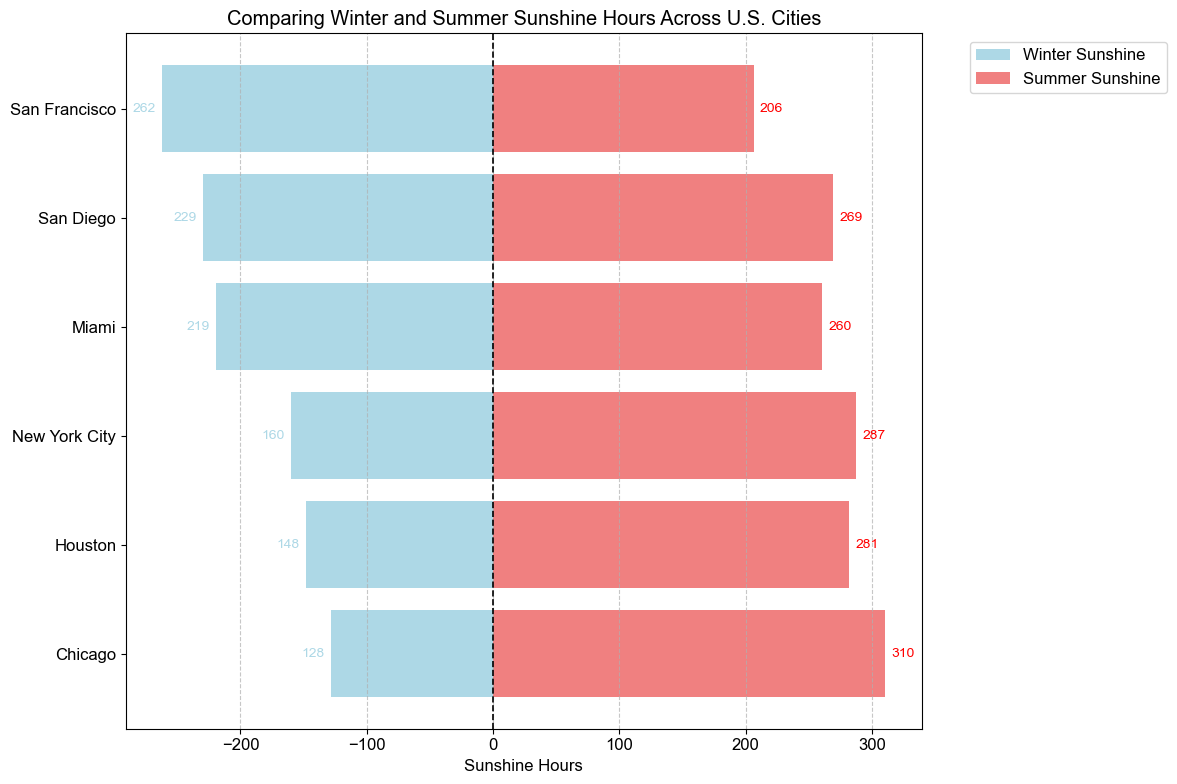

In [133]:
season = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall",
    12: "Winter",
}


data = pd.read_csv("assests/weather.csv")

data["season"] = data["monthnum"].apply(lambda x: season[x])

# Filter the pivot table to include only Summer and Winter seasons
pivot_data = data.pivot_table(
    index="city", columns="season", values="sunshine", aggfunc="mean"
)
pivot_data
pivot_data_filtered = pivot_data[["Summer", "Winter"]]

# Sort the data by Winter sunshine
pivot_data_filtered = pivot_data_filtered.sort_values(by=("Winter"), ascending=False)

# Reverse the order of the bar chart from top to bottom
fig, ax = plt.subplots(figsize=(12, 8))

# Reverse the index order for plotting
pivot_data_filtered_reversed = pivot_data_filtered[::-1]

# Plot Winter sunshine on the left side (negative direction)
bars_winter = ax.barh(
    pivot_data_filtered_reversed.index,
    -pivot_data_filtered_reversed["Winter"],
    color="lightblue",
    label="Winter Sunshine",
)

# Plot Summer sunshine on the right side (positive direction)
bars_summer = ax.barh(
    pivot_data_filtered_reversed.index,
    pivot_data_filtered_reversed["Summer"],
    color="lightcoral",
    label="Summer Sunshine",
)

# Add value labels for Winter bars
for bar in bars_winter:
    ax.text(
        bar.get_width() - 5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(-bar.get_width())}",
        ha="right",
        va="center",
        fontsize=10,
        color="lightblue",
    )

# Add value labels for Summer bars
for bar in bars_summer:
    ax.text(
        bar.get_width() + 5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center",
        fontsize=10,
        color="red",
    )

# Set labels and title
ax.set_xlabel("Sunshine Hours")
ax.set_title("Comparing Winter and Summer Sunshine Hours Across U.S. Cities")

# Add vertical line at zero for separation
ax.axvline(0, color="black", linewidth=1.2, linestyle="--")

# Add a legend
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# Add grid lines for better readability
ax.xaxis.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

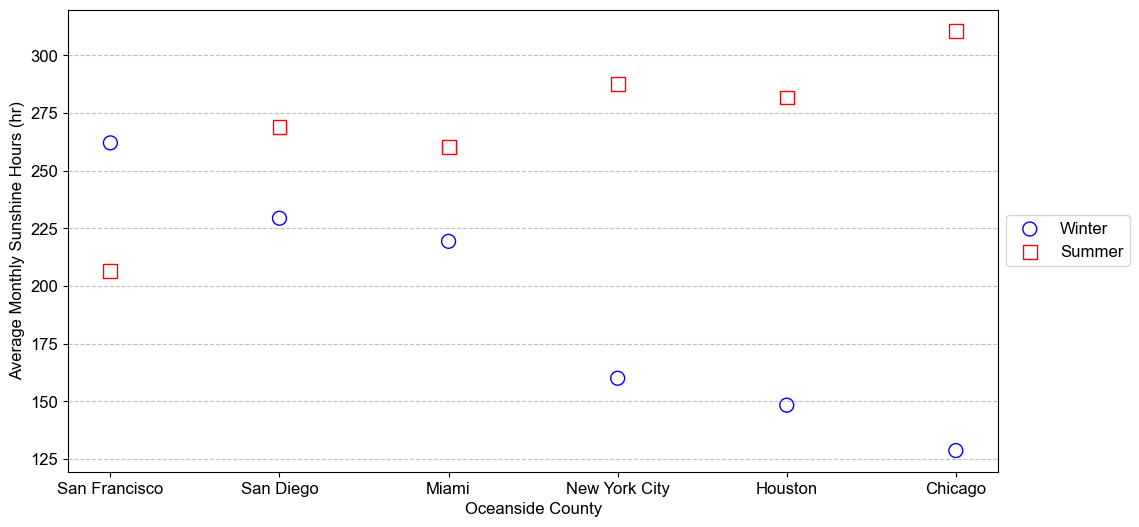

In [134]:
rcParams["font.family"] = "Arial"


season_weather = weather.pivot_table(
    index="city", columns="season", values="sunshine", aggfunc="mean"
)
season_weather = season_weather.sort_values(by="Winter", ascending=False)

# Define color and shape for seasons
season_color = {"Winter": "blue", "Summer": "red"}
season_shape = {"Winter": "o", "Summer": "s"}

# Filter only oceanside cities (San Diego and Miami in this case)
oceanside_cities = season_weather.index

plt.figure(figsize=(12, 6))
for season in ["Winter", "Summer"]:
    subset = season_weather.loc[oceanside_cities, season]
    plt.scatter(
        subset.index,
        subset.values,
        edgecolors=season_color[season],
        facecolors="none",
        marker=season_shape[season],
        label=f"{season}",
        s=100,
    )

plt.xlabel("Oceanside County")
plt.ylabel("Average Monthly Sunshine Hours (hr)")
# plt.title("Sunshine Hours by Season in Oceanside Cities")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(axis="y", linestyle='--', alpha=0.8)
plt.show()


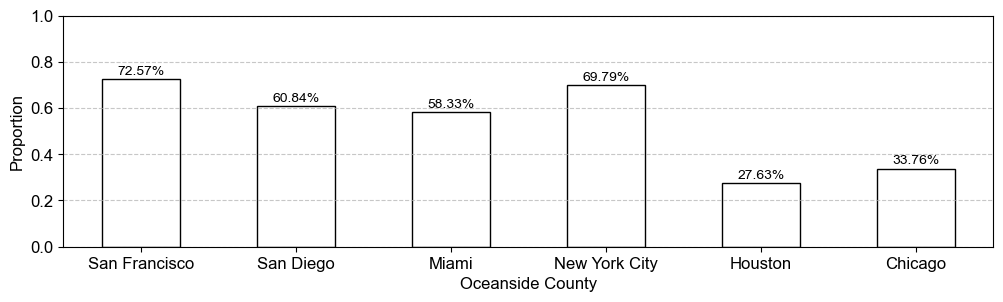

In [135]:
rcParams["font.family"] = "Arial"


# Calculate proportions for above the US average
proportion_data = (
    life_expect.groupby("County")["above_country_avg"]
    .value_counts(normalize=True)
    .unstack()
)
proportion_above_77 = proportion_data[True]
proportion_above_77 = proportion_above_77.reindex(['San Francisco', 'San Diego', 'Miami', 'New York City', 'Houston', 'Chicago'])

# Plotting bar chart
fig, ax = plt.subplots(figsize=(12, 3))

proportion_above_77.plot(
    kind="bar",
    edgecolor="black",  # Keep the border
    color="none",  # No fill color inside the bars
    ax=ax
)

# Adding labels on top of each bar
for index, value in enumerate(proportion_above_77):
    ax.text(index, value + 0.02, f"{value * 100:.2f}%", ha="center", fontsize=10)

# Adding labels and title
ax.set_xlabel("Oceanside County", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Make x-axis labels horizontal
plt.xticks(rotation=0)

plt.show()

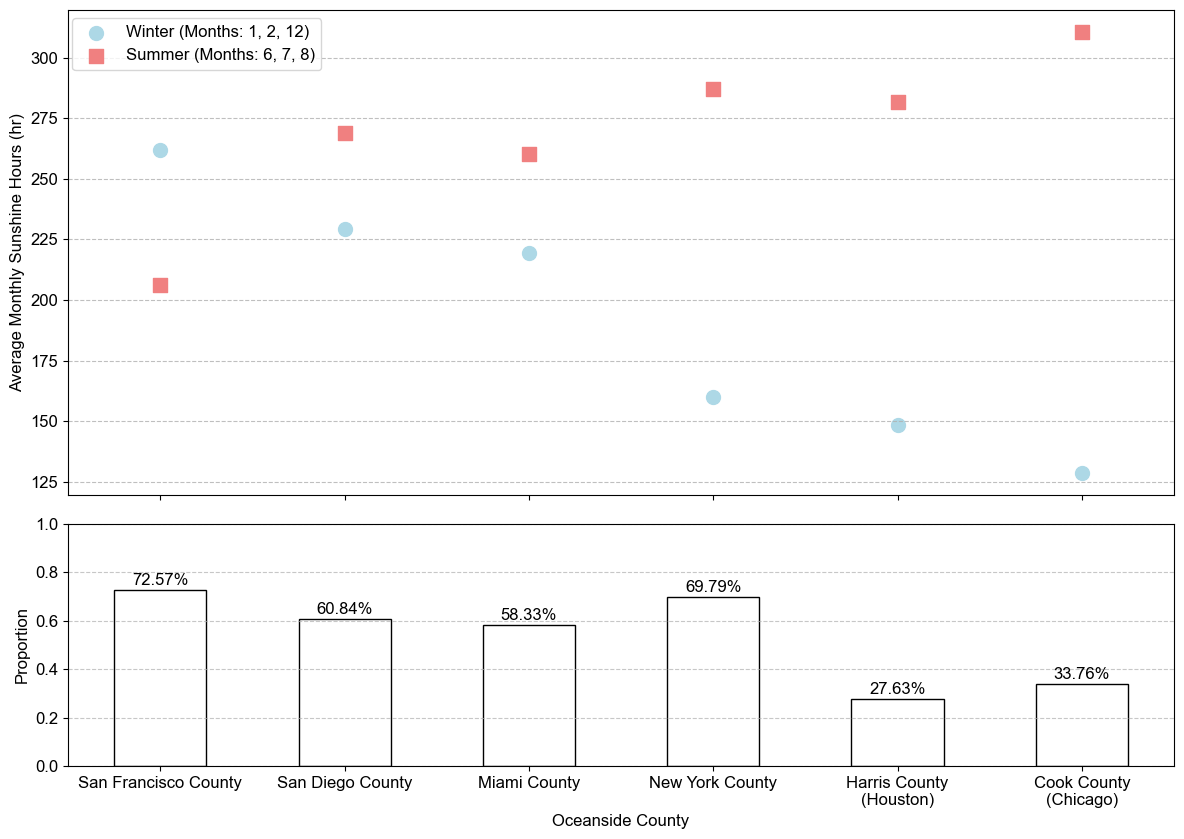

In [136]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font globally
rcParams["font.family"] = "Arial"
rcParams["font.size"] = 12  # Increase default font size

season_labels = {
    "Winter": "Winter (Months: 1, 2, 12)",
    "Summer": "Summer (Months: 6, 7, 8)"
}

# Figure and subplots with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

# Plot for Image 1 (Sunshine Scatterplot)
season_weather = weather.pivot_table(
    index="city", columns="season", values="sunshine", aggfunc="mean"
)
season_weather = season_weather.sort_values(by="Winter", ascending=False)

# Define color and shape for seasons
season_color = {"Winter": "lightblue", "Summer": "lightcoral"}
season_shape = {"Winter": "o", "Summer": "s"}

# Filter only oceanside cities (San Diego and Miami in this case)
oceanside_cities = season_weather.index

for season in ["Winter", "Summer"]:
    subset = season_weather.loc[oceanside_cities, season]
    axes[0].scatter(
        subset.index,
        subset.values,
        color=season_color[season],  # Fill shapes with the corresponding color
        marker=season_shape[season],
        label=season_labels[season],
        s=100,
    )

axes[0].set_ylabel("Average Monthly Sunshine Hours (hr)")
axes[0].grid(axis="y", linestyle="--", alpha=0.8)

# Plot for Image 2 (Proportion Bar Chart)
proportion_data = (
    life_expect.groupby("County")["above_country_avg"]
    .value_counts(normalize=True)
    .unstack()
)
proportion_above_77 = proportion_data[True]
proportion_above_77 = proportion_above_77.reindex(['San Francisco', 'San Diego', 'Miami', 'New York City', 'Houston', 'Chicago'])

# Update x-axis labels to add "County" with line breaks for long labels
update_county_name = []
for city in proportion_above_77.index:
    if city == 'Houston':
        update_county_name.append('Harris County\n(Houston)')
    elif city == 'Chicago':
        update_county_name.append('Cook County\n(Chicago)')
    elif city == 'New York City':
        update_county_name.append('New York County')
    else:
        update_county_name.append(f"{city} County")
proportion_above_77.index = update_county_name

proportion_above_77.plot(
    kind="bar",
    edgecolor="black",
    color="none",
    ax=axes[1]
)

# Add labels on top of bars
for index, value in enumerate(proportion_above_77):
    axes[1].text(index, value + 0.02, f"{value * 100:.2f}%", ha="center", fontsize=12)

axes[1].set_xlabel("Oceanside County", fontsize=12)
axes[1].set_ylabel("Proportion", fontsize=12)
axes[1].set_ylim(0, 1)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Ensure city names on x-axis are horizontal
plt.xticks(rotation=0)

# Add spacing between subplots
fig.subplots_adjust(hspace=0.5)  # Add space between the subplots

# Add a single legend for the entire figure
fig.legend(
    season_labels.values(),
    loc="upper left",
    bbox_to_anchor=(0.06, 0.93),
    fontsize=12
)

# Adjust overall layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space at the top for the legend

# Show the combined plot
plt.show()